# Titanic 

![alt text](https://github.com/dataworkshop/webinar-titanic/raw/3ff91e2d5e3c11eb11727b36d5625277bb0dd6a9/images/route.png)

![alt text](https://github.com/dataworkshop/webinar-titanic/raw/3ff91e2d5e3c11eb11727b36d5625277bb0dd6a9/images/iceberg_titanic.jpg)

![alt text](https://github.com/dataworkshop/webinar-titanic/raw/3ff91e2d5e3c11eb11727b36d5625277bb0dd6a9/images/life_boats.jpg)

![alt text](https://github.com/dataworkshop/webinar-titanic/raw/3ff91e2d5e3c11eb11727b36d5625277bb0dd6a9/images/lifeboats.png)

Na Titanicu było około 1300 pasażerów oraz 900 osób załogi. Co daje ponad 2200 ludzi.

Niestety było tam tylko 20 łodzi ratunkowych, w każdej tylko 65 miejsc.

Od początku było wiadomo, że duża część osób zginie.







In [362]:
# Klonowanie danych z repozytorium
! git clone https://github.com/Laboratory-ml/Titanic

fatal: destination path 'Titanic' already exists and is not an empty directory.


Import potrzebnych bibliotek

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
np.random.seed(2018)

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_validate

import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

Wczytywanie danych zplików CSV

In [364]:
df_train = pd.read_csv('Titanic/input/train.csv')
df_test = pd.read_csv('Titanic/input/test.csv')

print("df_train ma rozmiar: ", df_train.shape)
print("df_test ma rozmiar: ", df_test.shape)

df_train ma rozmiar:  (891, 12)
df_test ma rozmiar:  (418, 11)


Zobaczmy co siedzi w danych

In [365]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [366]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



# Features / Cechy:

* PassengerId - A numerical id assigned to each 
* Survived - Czy dana osoba przeżyła. 0 - Nie, 1 - Tak. Ta wartość pojawia się tylko w test
* Pclass - Klasa socio-economic (SEC), 1- Upper, 2 - Middle, 3rd - Lower
* Name - Imię i nazwisko oddzielone przecinkiem
* Sex - Płeć, ‘male’ - męzczyzna , ‘female’- kobieta
* Age - Wiek
* SibSp - (siblink) liczba rodzeństwa (brat i siostra) / (spouses) małżonków na pokładzie
* Parch - Liczba rodziców / dzieci na pokładzie Notka: Dziecko z nianią ma tutaj przypisaną wartość 0
* Ticket - Nr biletu
* Fare - Cena biletu
* Cabin - Nr kabiny
* Embarked - Port, w którym wsiadał pasażer (C = Cherbourg, Q = Queenstown, S = Southampton)

In [367]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [368]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Łączenie df_train i df_test w jeden obiekt df_all

In [0]:
df_all = pd.concat([df_train, df_test], sort=False)

In [370]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [371]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [372]:
df_all.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [373]:
!pip install missingno

In [0]:
import missingno as msno

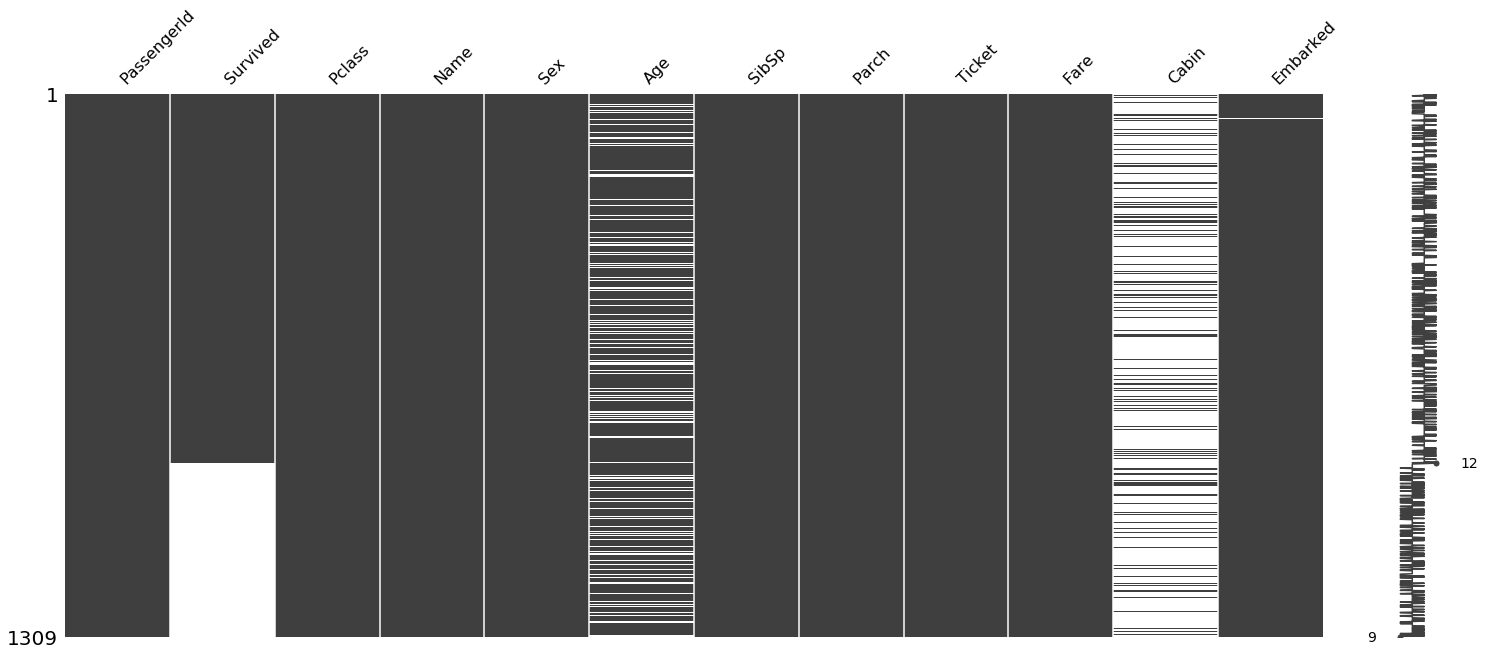

In [375]:
msno.matrix(df_all);

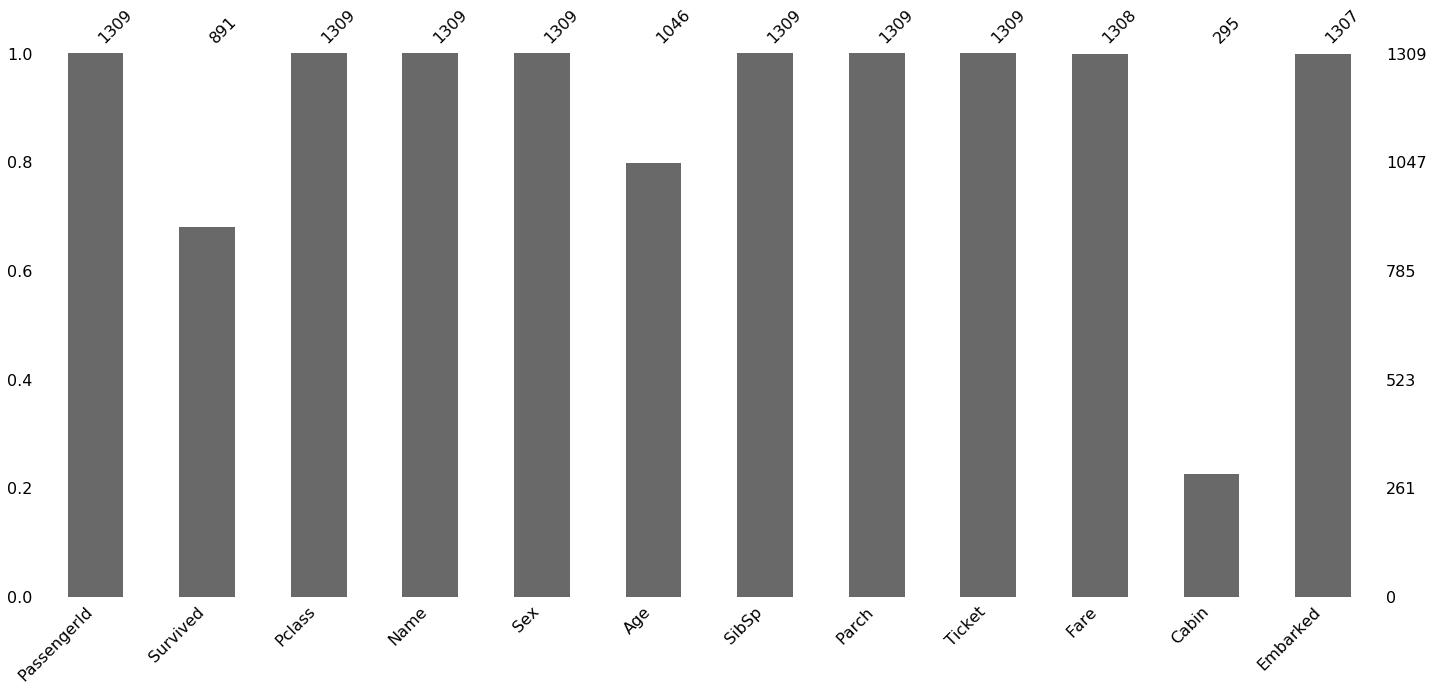

In [376]:
msno.bar(df_all);

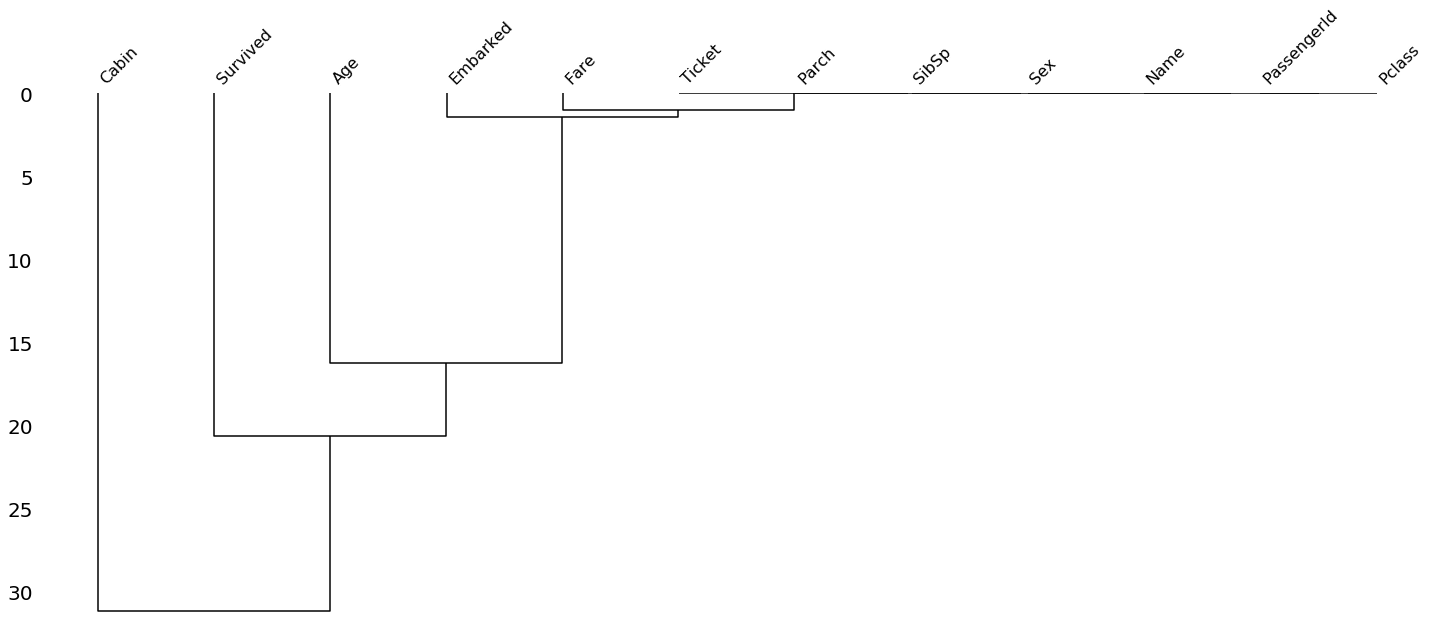

In [377]:
msno.dendrogram(df_all);

In [378]:

df_all.select_dtypes(include=[np.int, np.float]).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [379]:
def get_feats(df):
    feats = df.select_dtypes(include=[np.int64]).columns.values
    black_list = ['PassengerId', 'Survived']
    
    return [feat for feat in feats if feat not in black_list]


def get_models():
    return [
        ('Logistic Regression', LogisticRegression(solver='lbfgs')),
        ('Decision Tree Classifier', DecisionTreeClassifier()),
        ('Random Forest Classifier', RandomForestClassifier(n_estimators=100)),
        ('Extra Trees Classifier', ExtraTreesClassifier(n_estimators=100)),
    ]

SURV = 891
df_all[SURV:SURV+10:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
8,900,NaN,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


Funkcja rysująca wykres walidacji krzyżowej

In [0]:
def plot_result(model_name, result, ylim=(0, 1.)):
    mean_train = np.round( np.mean(result['train_score']), 2 )
    mean_test = np.round( np.mean(result['test_score']), 2 )
    
    plt.title('{0}: cross validation\nmean-train-acc:{1}\nmean-test-acc:{2}'.format(model_name, mean_train, mean_test))
    plt.plot( result['train_score'], 'r-o', label="train" )
    plt.plot( result['test_score'], 'g-o', label="test" )
    plt.legend(loc='best')
    plt.ylabel('Accuracy')
    plt.xlabel('# of fold')
    plt.ylim(*ylim)
    plt.show()

# Sprawdzian krzyżowy - na cholerę mi to!?

![alt text](https://miro.medium.com/max/2736/1*rgba1BIOUys7wQcXcL4U5A.png)

Sprawdzian krzyżowy (walidacja krzyżowa, kroswalidacja, sprawdzanie krzyżowe) – metoda statystyczna, polegająca na podziale próby statystycznej na podzbiory, a następnie przeprowadzaniu wszelkich analiz na niektórych z nich (zbiór uczący), podczas gdy pozostałe służą do potwierdzenia wiarygodności jej wyników (zbiór testowy, zbiór walidacyjny).

In [0]:
 #df_all = feature_engineering(df_all)

In [0]:
def cross_val_plot(df_all):
  
  feats = get_feats(df_all)

  X = df_all[:SURV][feats].values
  y = df_all[:SURV]['Survived'].values

  for model_name, model in get_models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=5, return_train_score=True)
    # print(model_name)
    plot_result(model_name, result)



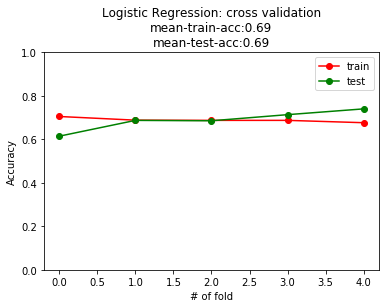

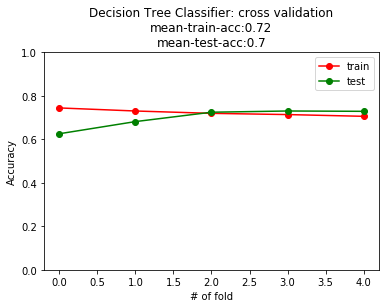

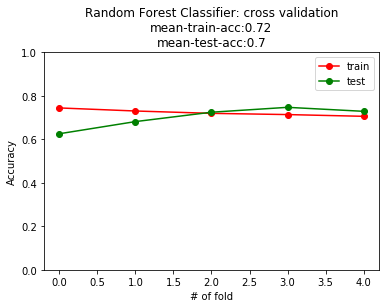

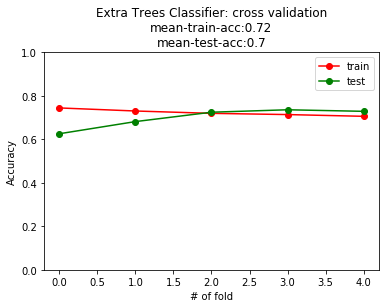

In [383]:
cross_val_plot(df_all)

Predykcja - oszacujmy kto ze zbioru testowego przeżyje

In [0]:
from google.colab import files

def make_prediction_from_df_all(df_all, model, output_file_name):
    
    sub = df_all[SURV:].copy()

    #df_all = feature_engineering(df_all)
    feats = get_feats(df_all)

    X_train = df_all[:SURV][feats].values
    y_train = df_all[:SURV]['Survived'].values
    X_test = df_all[SURV:][feats]

    print(model)
    model.fit(X_train, y_train)

    sub['Survived'] = model.predict(X_test).astype(int)
    sub[ ['PassengerId', 'Survived'] ].to_csv(output_file_name, index=False)
    files.download(output_file_name)

# Wykonanie predykcji, zapis wyników dopliku CSV

In [385]:
make_prediction_from_df_all(df_all, LogisticRegression(solver='lbfgs'), 'LogisticRegression-10.csv')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


![alt text](https://miro.medium.com/max/2592/0*1IMzGS56ZIZpY2QI)

# Feature engineering

Popatrzmy na dane, odszukajmy zależności

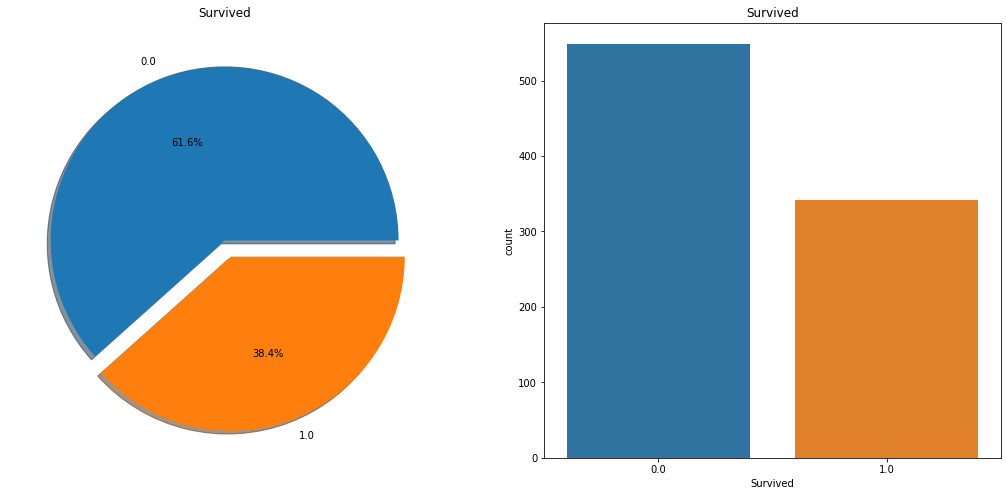

In [386]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_all['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_all,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#  Sex, Survived vs Dead

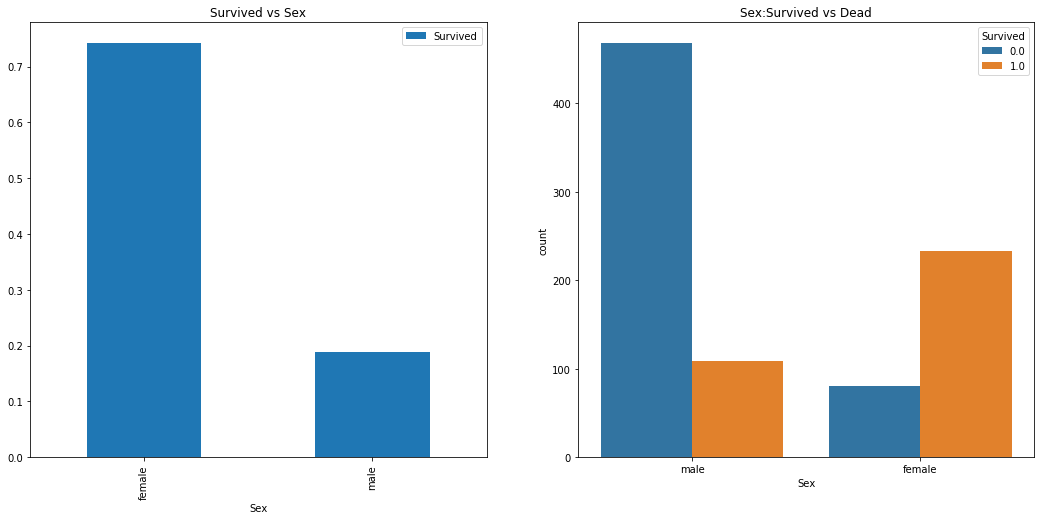

In [387]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_all[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df_all,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

To wygląda interesująco. Liczba mężczyzn na statku jest znacznie większa niż liczba kobiet. 

Mimo to liczba uratowanych kobiet jest prawie dwa razy większa niż uratowanych mężczyzn. 

Wskaźniki przeżycia kobiet na statku wynoszą około 75%, a mężczyzn około 18–19%.


**Dokonamy teraz modyfikacji zwanej Factorize**


In [0]:
df_all['Sex_cat'] = pd.factorize( df_all['Sex'] )[0]

In [389]:
df_all.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


# Pclass

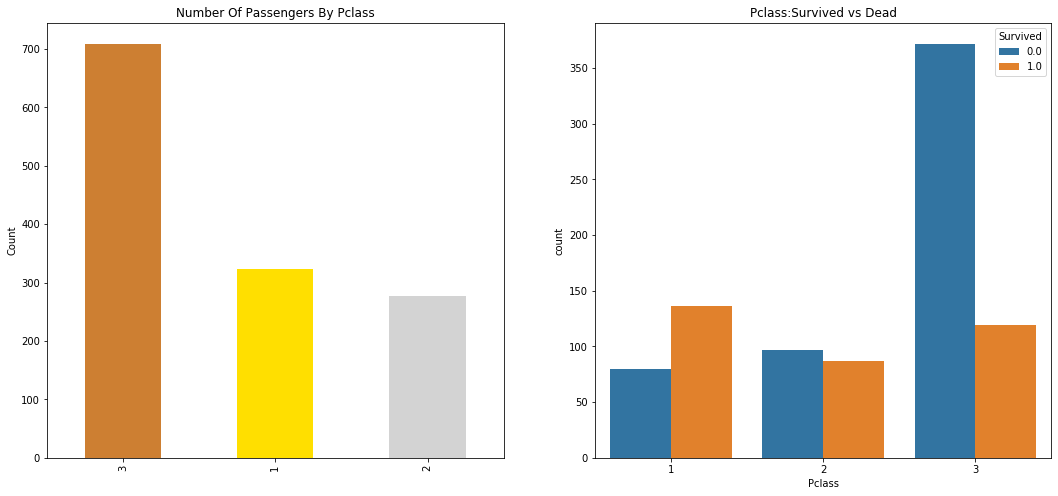

In [390]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_all['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df_all,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Wyraźnie widać, że Passenegers Of Pclass 1 otrzymali bardzo wysoki priorytet podczas ratowania. 
Mimo że liczba pasażerów w klasie 3 była znacznie wyższa, wciąż liczba przeżywających je osób jest bardzo niska, około 25%.

Dla Pclass 1% przeżył około 63%, podczas gdy dla Pclass2 około 48%. Więc pieniądze i status mają znaczenie.
Taki materialistyczny świat.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


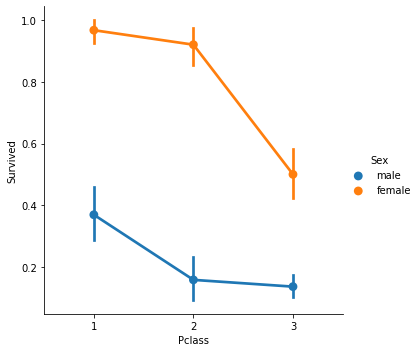

In [391]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_all)
plt.show()

# Age

In [392]:
print('Najstarszy pasażer:', df_all['Age'].max(),'lat')
print('Najmłodszy pasażer:', df_all['Age'].min(),'lat')
print('Średnia wieku', df_all['Age'].mean(),'lat')

Najstarszy pasażer: 80.0 lat
Najmłodszy pasażer: 0.17 lat
Średnia wieku 29.881137667304014 lat


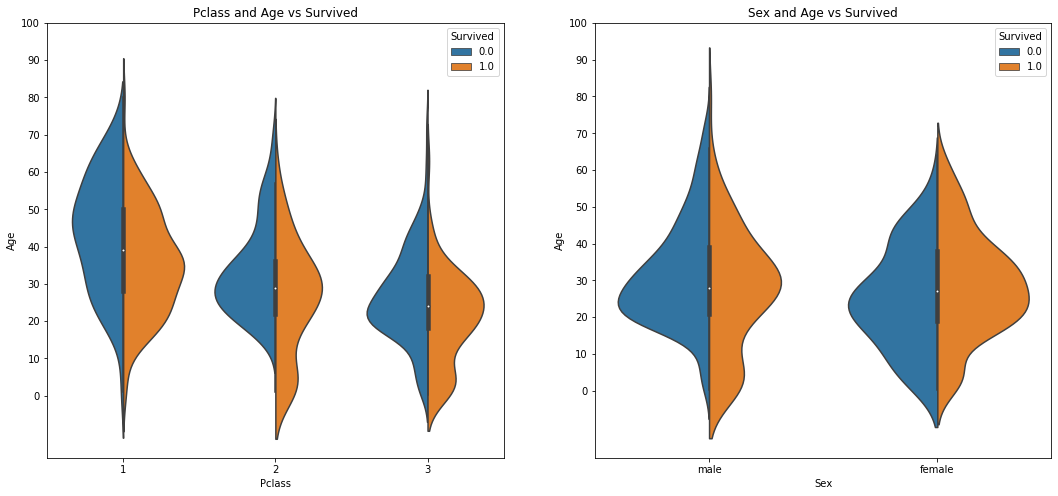

In [393]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_all, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_all, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Obserwacje:
1) Liczba dzieci wzrasta wraz z Pclass, a wskaźnik przeżycia dla osób w wieku poniżej 10 lat (tj. dzieci) wydaje się być dobry, niezależnie od Pclass.

2) Szanse na przeżycie dla pasażerów w wieku 20-50 lat z Pclass1 są wysokie i są najlepsze dla kobiet.

3) W przypadku mężczyzn szanse na przeżycie zmniejszają się wraz ze wzrostem wieku.

Jak widzieliśmy wcześniej, cecha **Age** ma wiele wartości zerowych. Aby zastąpić te wartości NaN, możemy przypisać im średni wiek zestawu danych - ale czy todobre wyjście?

Problem polega jednak na tym, że było wielu ludzi w różnym wieku. Po prostu nie możemy przypisać 4-letniego dziecka w średnim wieku, który wynosi 29 lat. Czy jest jakiś sposób, aby dowiedzieć się, w jakim przedziale wiekowym leży pasażer?

Możemy sprawdzić cechę Name. Patrząc na tę cechę, widzimy, że imiona mają przedrostek, takie jak Pan lub Pani. W ten sposób możemy przypisać średnie wartości Panu i Pani do odpowiednich grup.



# Name

In [0]:
df_all['Initial']=0
for i in df_all:
    df_all['Initial']=df_all.Name.str.extract('([A-Za-z]+)\.')

Okej, więc tutaj używamy Regex: [A-Za-z] +) . Szukamy ciągów, które leżą między A-Z lub a-z, po których następuje ".". Dlatego z powodzeniem wyodrębniamy inicjały z nazwy.

In [395]:
pd.crosstab(df_all.Initial,df_all.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


Sprawdzamy występujące wartości

In [396]:
df_all['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Don           1
Sir           1
Lady          1
Countess      1
Jonkheer      1
Capt          1
Mme           1
Dona          1
Name: Initial, dtype: int64


Więc jest kilka błędnie napisanych przedrostków, takich jak Mlle lub Mme, które oznaczają Miss. Zastąpię je Miss i to samo dla innych wartości.

In [0]:
df_all['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace=True)

# Age

Uzupełnianie brakujących wartości

In [398]:
df_all.groupby('Initial')['Age'].mean()

Initial
Dona      39.000000
Master     5.482642
Miss      21.834533
Mr        32.545531
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

Uzupełnianie brakujących wartości Age

In [0]:
df_all.loc[(df_all.Age.isnull())&(df_all.Initial=='Mr'),'Age']=33
df_all.loc[(df_all.Age.isnull())&(df_all.Initial=='Mrs'),'Age']=36
df_all.loc[(df_all.Age.isnull())&(df_all.Initial=='Master'),'Age']=5
df_all.loc[(df_all.Age.isnull())&(df_all.Initial=='Miss'),'Age']=22
df_all.loc[(df_all.Age.isnull())&(df_all.Initial=='Other'),'Age']=46

Sprawdzamy czy są brakujące dane

In [400]:
df_all.Age.isnull().any()

False

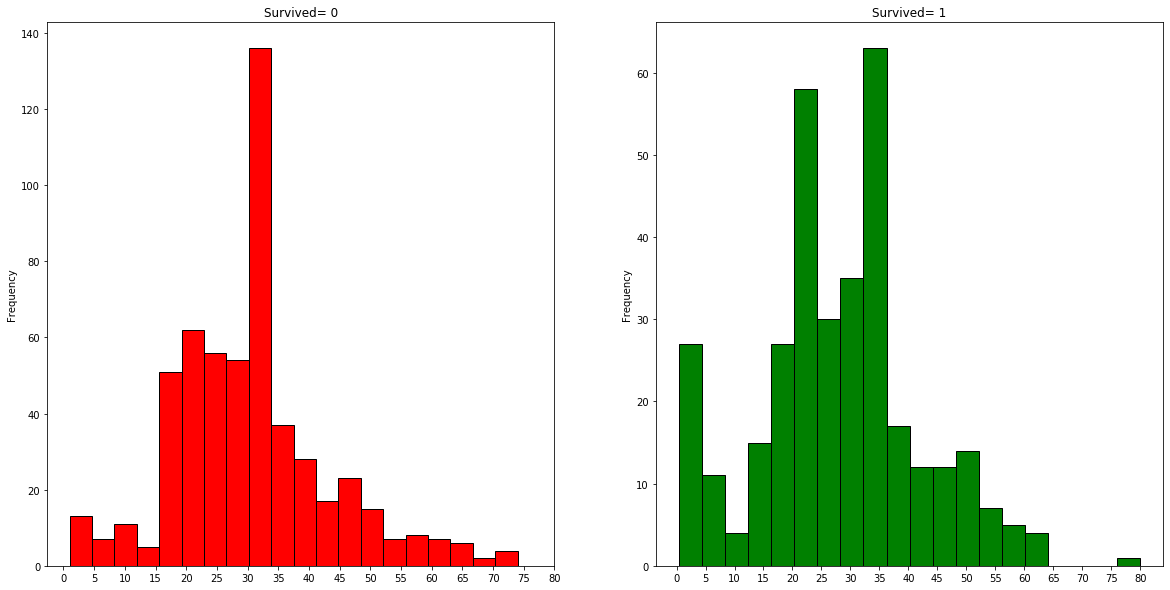

In [401]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df_all[df_all['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df_all[df_all['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Obserwacje:

1) Małe dzieci (wiek poniżej 5 lat) zostały uratowane w dużych ilościach.Zadziałały zasady dotyczące kobiet i dzieci w pierwszej kolejności.

2) Uratowano najstarszego pasażera - 80 lat.

3) Maksymalna liczba zgonów dotyczyła osób w wieku 30–40 lat.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


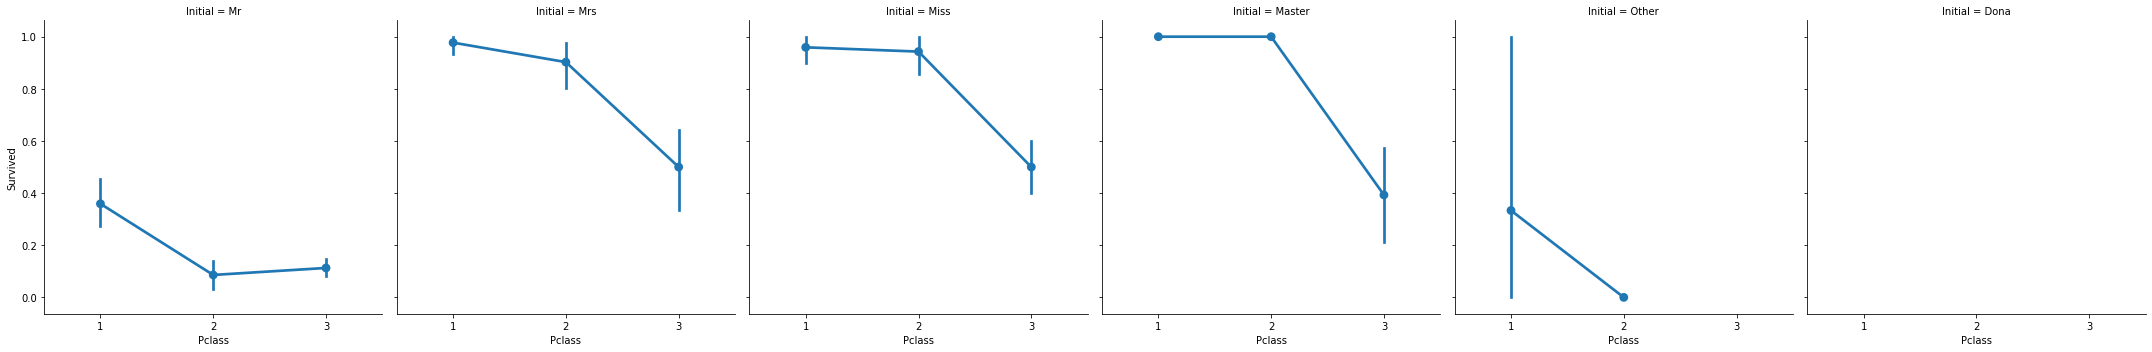

In [402]:
sns.factorplot('Pclass','Survived', col='Initial', data=df_all)
plt.show()

# Embarked

In [403]:
pd.crosstab([df_all.Embarked,df_all.Pclass],[df_all.Sex,df_all.Survived], margins=True).style.background_gradient(cmap='summer_r')

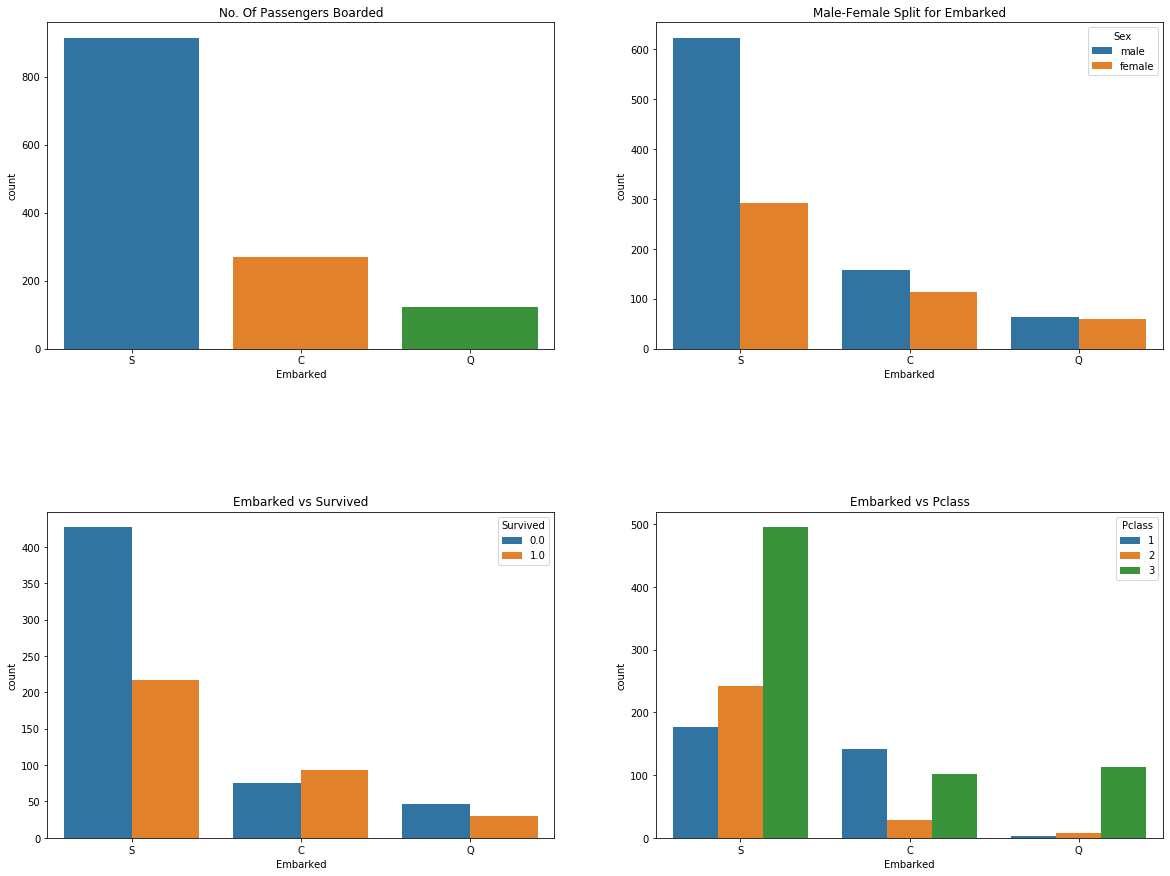

In [404]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_all,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_all,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df_all,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_all,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Obserwacje:

1) Maksymalna liczba osób wchodzących na pokład pochodziła z portu S. Większość z nich pochodzi z Pclass3.

2) Pasażerowie z C wyglądają na szczęściarzy, ponieważ spora ich część przeżyła. Powodem tego może być uratowanie wszystkich pasażerów Pclass1 i Pclass2.

3) Embark S wygląda na port, z którego weszła większość bogatych ludzi. Jednak szanse na przeżycie są tutaj niskie, ponieważ wielu pasażerów z Pclass3 około 81% nie przeżyło.

4) W porcie Q prawie 95% pasażerów pochodziło z Pclass3.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


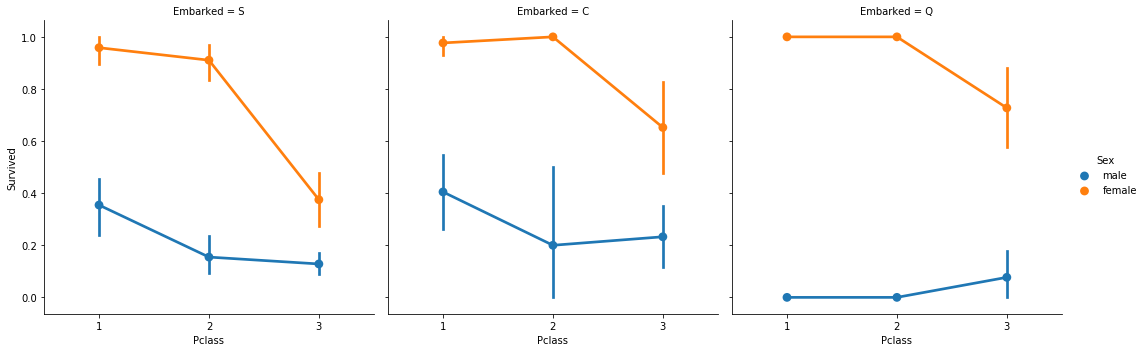

In [405]:
sns.factorplot('Pclass','Survived', hue='Sex', col='Embarked', data=df_all)
plt.show()


Obserwacje:

1) Szanse na przeżycie są prawie 1 dla kobiet dla Pclass1 i Pclass2, niezależnie od Pclass.

2) Port S wydaje się być bardzo pechowy dla Pclass3, ponieważ wskaźnik przeżycia zarówno dla mężczyzn jak i kobiet jest bardzo niski.

3) Wygląda na to, że port Q wydaje się być najszczęśliwszy dla mężczyzn, ponieważ prawie wszystkie pochodzą z klasy 3.

Uzupełnianie brakujących wartości.

Jak widzieliśmy, maksymalna liczba pasażerów wsiada do portu S, zastępujemy NaN wartością S.

In [0]:
df_all['Embarked'].fillna('S',inplace=True)

Sprawdzamy czy są brakujące dane

In [407]:
df_all.Embarked.isnull().any()

False

**Embarked - Factorize**

In [0]:
df_all['Embarked_cat'] = pd.factorize( df_all['Embarked'] )[0]

In [409]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat,Initial,Embarked_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0


# SibSip

Ta cecha mówi nam czy dana osoba jest sama czy z członkami rodziny.

Rodzeństwo = brat, siostra, przyrodni brat, przyrodnia siostra

Małżonek = mąż, żona

In [410]:
pd.crosstab([df_all.SibSp],df_all.Survived).style.background_gradient(cmap='summer_r')

Survived,0.0,1.0
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


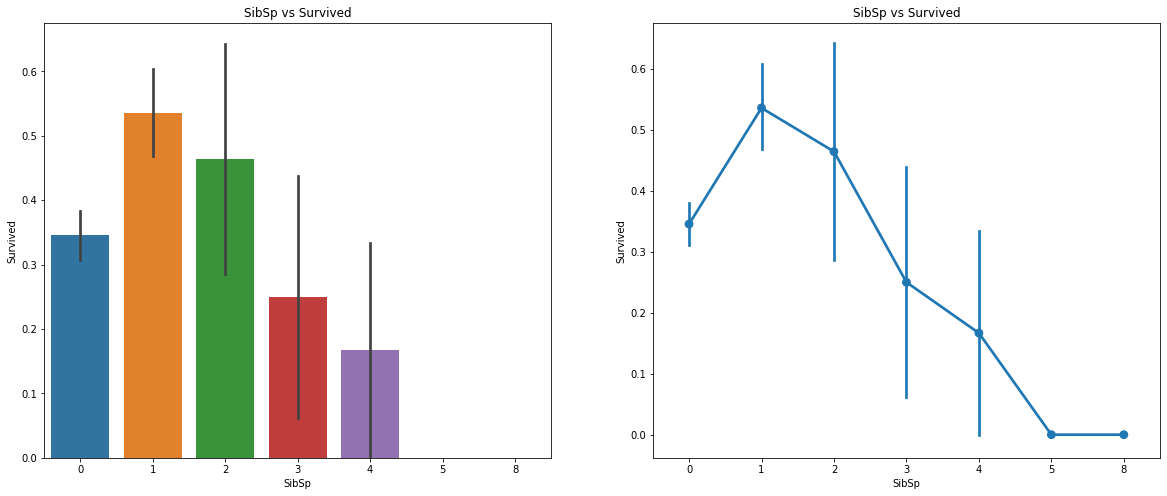

In [411]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=df_all,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=df_all,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show();

In [412]:
pd.crosstab(df_all.SibSp,df_all.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
SibSp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


Obserwajce:

Wykres słupkowy i czynnikowy pokazują, że jeśli pasażer jest sam na pokładzie bez rodzeństwa, ma 34,5% szans na przeżycie. Wykres z grubsza maleje, jeśli liczba rodzeństwa wzrasta. To ma sens. To znaczy, jeśli mam rodzinę na pokładzie, postaram się je uratować, zamiast ratować siebie. Zaskakujące jest, że przeżycie rodzin z 5-8 członkami wynosi 0%. Przyczyną może być Pclass? Pomyśl...



# Parch

Rodzic = matka, ojciec

Dziecko = córka, syn, pasierbica, pasierb

In [413]:
pd.crosstab(df_all.Parch, df_all.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,242,206,554
1,50,43,77
2,27,25,61
3,2,3,3
4,2,0,4
5,0,0,6
6,0,0,2
9,0,0,2


Tabela przestawna ponownie pokazuje, że większe rodziny były w klasie Pclass3.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


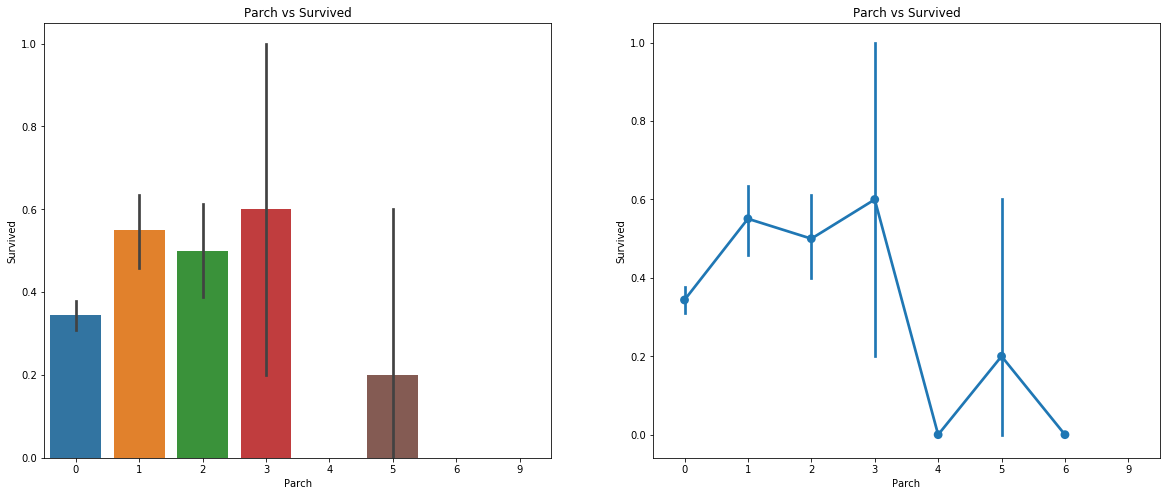

In [414]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=df_all,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=df_all,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Obserwacje:

Również tutaj wyniki są dość podobne. Pasażerowie z rodzicami na pokładzie mają większą szansę na przeżycie. Zmniejsza się jednak wraz ze znacznym wzrostem liczby.

Szanse na przeżycie są dobre dla kogoś, kto ma 1-3 rodziców/dzieci na statku. Bycie samemu również okazuje się śmiertelne, a szanse na przeżycie zmniejszają się, gdy ktoś ma> 4 rodziców/dzieci na statku.

# Fare

In [415]:
df_all[df_all['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat,Initial,Embarked_cat
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0,Mr,0


In [416]:
val = df_all[(df_all['Pclass'] == 3) 
     & (df_all['Embarked'] == 'S') 
     & (df_all['Parch'] == 0) 
     & (df_all['Sex'] == 'male')
     & (df_all['Age'] >40.0)      
      ][['Age','Fare']];
val.groupby('Age').agg(['min','max','count','mean','median'])

Fare                                   
          min      max count       mean   median
Age                                             
40.5  15.1000  15.1000     1  15.100000  15.1000
41.0   7.1250  14.1083     3   9.694433   7.8500
42.0   7.5500   8.6625     3   7.954167   7.6500
43.0   6.4500   8.0500     3   7.465267   7.8958
44.0   7.9250   8.0500     3   8.008333   8.0500
45.0   6.9750   8.0500     2   7.512500   7.5125
47.0   7.2500   9.0000     2   8.125000   8.1250
48.0   7.8542   7.8542     1   7.854200   7.8542
49.0   0.0000   0.0000     1   0.000000   0.0000
50.0   8.0500  14.5000     2  11.275000  11.2750
51.0   7.0542   8.0500     3   7.618067   7.7500
55.5   8.0500   8.0500     1   8.050000   8.0500
59.0   7.2500   7.2500     1   7.250000   7.2500
60.5      NaN      NaN     0        NaN      NaN
61.0   6.2375   6.2375     1   6.237500   6.2375
74.0   7.7750   7.7750     1   7.775000   7.7750

Można przypuszczać że osoby w tym wieku średnio płaciły między 6 a 7 funtów. Możemy w takim razie przyjąć średnią z tych dwóch wartości. Różnica między 6 a 7 jest zbyt mała aby mieć istotny wpływ w porównaniu do całego obszaru cen (od 0 do 512, gdzie średnia to 33 a mediana to 14)

In [0]:
df_all.at[152,'Fare'] =  (7.25 + 6.2375)/2;

Sprawdzamy czy są jeszcze jakieś brakujące dane w kolumnie

In [418]:
df_all.Fare.isnull().any()

False

In [419]:
print('Najdroższy bilet:', df_all['Fare'].max())
print('Najtańszy bilet:', df_all['Fare'].min())
print('Średnia cena biletu:', df_all['Fare'].mean())

Najdroższy bilet: 512.3292
Najtańszy bilet: 0.0
Średnia cena biletu: 33.274197402597444


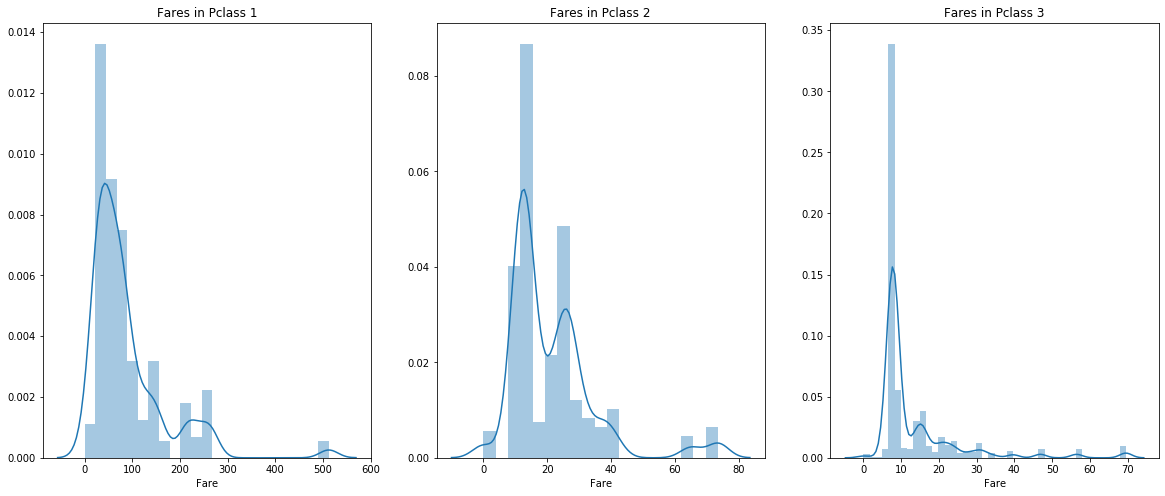

In [420]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_all[df_all['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df_all[df_all['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(df_all[df_all['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# Cabin

In [0]:
  df_all['cabin_norm'] = df_all['Cabin'].map(lambda x: 'missing' if str(x) == 'nan' else x[0] )
  df_all['cabin_norm_cat'] = pd.factorize( df_all['cabin_norm'] )[0]

In [422]:
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat,Initial,Embarked_cat,cabin_norm,cabin_norm_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,0,missing,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,0,missing,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,0,C,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0,missing,0


In [423]:
df_all.isna().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
Sex_cat              0
Initial              0
Embarked_cat         0
cabin_norm           0
cabin_norm_cat       0
dtype: int64

# Sprawdzamy czy nasz model daje lepsze wyniki

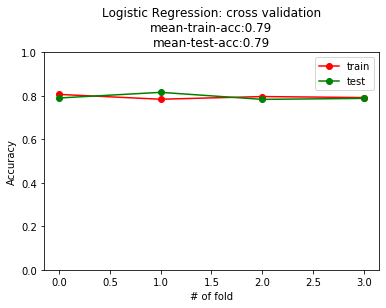

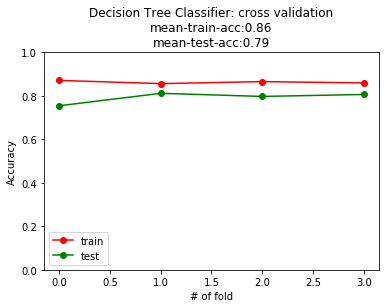

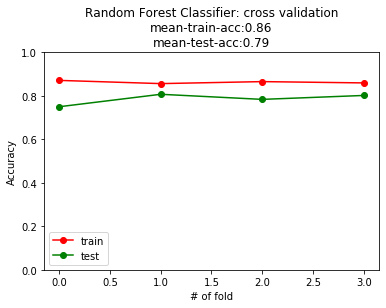

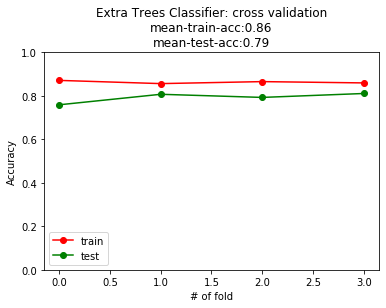

In [424]:
def get_feats_after_fe(df):
    feats = df.select_dtypes(include=[np.int64]).columns.values
    black_list = ['PassengerId', 'Survived', 'Sex', 'Embarked', 'Cabin']
    
    return [feat for feat in feats if feat not in black_list]


feats_after_fe = get_feats_after_fe(df_all)

X = df_all[:SURV][feats_after_fe].values
y = df_all[:SURV]['Survived'].values


for model_name, model in get_models():
    result = cross_validate(model, X, y, scoring='accuracy', cv=4, return_train_score=True)
    # print(model_name)
    plot_result(model_name, result)

In [0]:
def make_prediction_from_df_all_after_fe(df_all, model, output_file_name):
    
    sub = df_all[SURV:].copy()

    #df_all = feature_engineering(df_all)
    feats = get_feats_after_fe(df_all)

    X_train = df_all[:SURV][feats].values
    y_train = df_all[:SURV]['Survived'].values
    X_test = df_all[SURV:][feats]

    print(model)
    model.fit(X_train, y_train)

    sub['Survived'] = model.predict(X_test).astype(int)
    sub[ ['PassengerId', 'Survived'] ].to_csv(output_file_name, index=False)
    files.download(output_file_name)

In [432]:
make_prediction_from_df_all_after_fe(df_all, LogisticRegression(solver='lbfgs', C=0.5), 'LogisticRegression-end_C.csv')

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# To może teraz OHE - One Hot Encoding

![alt text](https://naadispeaks.files.wordpress.com/2018/04/mtimfxh.png?w=371&h=146)

In [0]:
onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(df_all[['Embarked']])

In [0]:
df_all["Embarked_C"] = train_OneHotEncoded[:,0]
df_all["Embarked_Q"] = train_OneHotEncoded[:,1]
df_all["Embarked_S"] = train_OneHotEncoded[:,2]

In [430]:
df_all.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_cat,Initial,Embarked_cat,cabin_norm,cabin_norm_cat,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,0,missing,0,0.0,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,1,C,1,1.0,0.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss,0,missing,0,0.0,0.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,0,C,1,0.0,0.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,0,missing,0,0.0,0.0,1.0


# Feature engineering to podstawa. Zbieraj dane, czyść dane, uzupełniaj.... 